In [1]:
import cv2
import dlib
import numpy as np

In [2]:
self = cv2.imread("data/self.png")
xiaohu = cv2.imread("data/xiaohu.jpg")

In [3]:
cv2.imshow("self", self)
cv2.imshow("xiaohu", xiaohu)
cv2.waitKey(0)

-1

In [4]:
print(self.shape)
print(xiaohu.shape)

(474, 474, 3)
(474, 474, 3)


Part 1. Defining Correspondences

In [2]:
def get_boundary_points(base_points, shape):
    x, y, w, h = cv2.boundingRect(np.array([base_points], np.int32))
    
    wp_list = [0.1, 0.13, 0.15, 0.33]
    hp_list = [-0.03, -0.05, -0.08, -0.12]
    
    height = shape[0] - 10
    width = shape[1] - 10
    
    #print(shape)
    
    # !!! in point (width, height)  inverse of cv2 format !!!
    boundary_points = [[10,10],[10,height],[width,10],[width,height]]
    
    for i in range(len(wp_list)):
        space_w = int(w * wp_list[i])
        space_h = int(h * hp_list[i])
        
        boundary_points.append([x+space_w, y+space_h])
        boundary_points.append([x+w-space_w, y+space_h])
        
    return boundary_points


def get_face_points(img, weight_path="shape_predictor_68_face_landmarks.dat", boundary=True):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(weight_path)
    
    if(img.shape[2] == 3):
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heads = detector(image, 1)
    num_of_head = len(heads)
    
    if(num_of_head == 0):
        print("No head found!")
        return None
    elif(num_of_head > 1):
        print("More than 1 head found, please input image incluing only one head")
        return None
    
    # only one head
    head = heads[0]
    landmarks = predictor(image, head)
    
    base_points = np.array([(landmarks.part(i).x, landmarks.part(i).y) \
                       for i in range(68)],  dtype=np.int32)
    
    boundary_points = None
    if(boundary == True):
        boundary_points = get_boundary_points(base_points, img.shape)
        
    if(boundary == True):
        all_points = np.vstack([base_points, boundary_points])
    else:
        all_points = base_points
    
    return all_points

def show_face_points(image, points, save_path):
    
    draw = image.copy()
    
    for point in points:
        x,y = point[0],point[1]
        cv2.circle(draw, (x, y), 2, (0, 255, 0), -1)
        
    cv2.imwrite(save_path, draw)
    cv2.imshow("Facial Landmarks", draw)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return draw
    

In [9]:
self_points = get_face_points(self)
xiaohu_points = get_face_points(xiaohu)

In [10]:
self_result = show_face_points(self, self_points, "data/self_basic_points.jpg")

In [11]:
xiaohu_result = show_face_points(xiaohu, xiaohu_points, "data/xiaohu_basic_points.jpg")

Now I want to add more points through mouse input

In [29]:
# 鼠标点击事件回调函数
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # 记录鼠标点击的坐标
        points1.append((x, y))
        print("Clicked at (x={}, y={})".format(x, y))
        
        cv2.circle(self_result, (x, y), 2, (0, 255, 0), -1)

points1 = []  # 用于存储点击点的坐标

# 创建窗口并绑定鼠标事件回调函数
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_callback)

print("begin")

while True:
    cv2.imshow("Image", self_result)
    key = cv2.waitKey(1) & 0xFF

    # 按下 "q" 键退出循环
    if key == ord("q"):
        cv2.imwrite("data/self_points.jpg", self_result)
        break

cv2.destroyAllWindows()

# 打印所有记录的点的坐标
#print("Recorded points:")
#for point in points1:
#    print(point)

begin
Clicked at (x=165, y=357)
Clicked at (x=167, y=381)
Clicked at (x=150, y=399)
Clicked at (x=114, y=419)
Clicked at (x=86, y=431)
Clicked at (x=43, y=441)
Clicked at (x=146, y=428)
Clicked at (x=161, y=442)
Clicked at (x=184, y=457)
Clicked at (x=215, y=465)
Clicked at (x=247, y=469)
Clicked at (x=282, y=465)
Clicked at (x=309, y=455)
Clicked at (x=335, y=438)
Clicked at (x=351, y=415)
Clicked at (x=338, y=397)
Clicked at (x=323, y=379)
Clicked at (x=321, y=349)
Clicked at (x=372, y=409)
Clicked at (x=402, y=422)
Clicked at (x=438, y=431)
Clicked at (x=245, y=386)
Clicked at (x=248, y=428)
Clicked at (x=204, y=404)
Clicked at (x=300, y=400)
Clicked at (x=241, y=42)
Clicked at (x=206, y=41)
Clicked at (x=177, y=50)
Clicked at (x=147, y=66)
Clicked at (x=122, y=84)
Clicked at (x=104, y=105)
Clicked at (x=104, y=132)
Clicked at (x=105, y=167)
Clicked at (x=271, y=46)
Clicked at (x=297, y=52)
Clicked at (x=322, y=61)
Clicked at (x=346, y=77)
Clicked at (x=364, y=97)
Clicked at (x=374,

In [30]:
print(len(points1))

40


In [31]:
# 鼠标点击事件回调函数
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # 记录鼠标点击的坐标
        points2.append((x, y))
        print("Clicked at (x={}, y={})".format(x, y))
        
        cv2.circle(xiaohu_result, (x, y), 2, (0, 255, 0), -1)

points2 = []  # 用于存储点击点的坐标

# 创建窗口并绑定鼠标事件回调函数
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_callback)

print("begin")

while True:
    cv2.imshow("Image", xiaohu_result)
    key = cv2.waitKey(1) & 0xFF

    # 按下 "q" 键退出循环
    if key == ord("q"):
        cv2.imwrite("data/xiaohu_points.jpg", xiaohu_result)
        break

cv2.destroyAllWindows()

# 打印所有记录的点的坐标
#print("Recorded points:")
#for point in points1:
#    print(point)

begin
Clicked at (x=165, y=365)
Clicked at (x=164, y=387)
Clicked at (x=154, y=411)
Clicked at (x=117, y=428)
Clicked at (x=78, y=439)
Clicked at (x=40, y=455)
Clicked at (x=162, y=431)
Clicked at (x=173, y=451)
Clicked at (x=189, y=464)
Clicked at (x=215, y=469)
Clicked at (x=247, y=469)
Clicked at (x=280, y=469)
Clicked at (x=306, y=463)
Clicked at (x=323, y=449)
Clicked at (x=331, y=434)
Clicked at (x=328, y=416)
Clicked at (x=318, y=396)
Clicked at (x=317, y=374)
Clicked at (x=359, y=428)
Clicked at (x=389, y=436)
Clicked at (x=424, y=449)
Clicked at (x=246, y=415)
Clicked at (x=246, y=441)
Clicked at (x=203, y=422)
Clicked at (x=292, y=423)
Clicked at (x=246, y=47)
Clicked at (x=207, y=49)
Clicked at (x=177, y=62)
Clicked at (x=157, y=78)
Clicked at (x=135, y=98)
Clicked at (x=122, y=127)
Clicked at (x=119, y=154)
Clicked at (x=122, y=185)
Clicked at (x=281, y=51)
Clicked at (x=313, y=59)
Clicked at (x=336, y=75)
Clicked at (x=352, y=95)
Clicked at (x=368, y=123)
Clicked at (x=372

In [32]:
print(len(points2))

40


In [61]:
for i in range(len(points1)):
    point1 = [points1[i][0],points1[i][1]]
    self_points = np.append(self_points, [point1], axis=0)
    point2 = [points2[i][0],points2[i][1]]
    xiaohu_points = np.append(xiaohu_points, [point2], axis=0)
    
assert(len(self_points) == len(xiaohu_points))

In [62]:
# save these points
np.save("data/self_points.npy", self_points)
np.save("data/xiaohu_points.npy", xiaohu_points)

In [12]:
self_points = np.load("data/self_points.npy")
xiaohu_points = np.load("data/xiaohu_points.npy")

Part 2. Computing the "Mid-way Face"

Step1: generate the triangulations

In [13]:
from scipy import spatial

self_tri = spatial.Delaunay(self_points)
xiaohu_tri = spatial.Delaunay(xiaohu_points)

In [3]:
from scipy import spatial

def show_triangulation(image, delaunay, save_path):
    draw_img = image.copy()

    # index of triangles
    tri_vertices = delaunay.vertices

    # paint triangulation
    for triangle in tri_vertices:
        # pos of each point of triangulation
        triangle_points = delaunay.points[triangle]
        # type into int
        triangle_points = triangle_points.astype(int)
        # draw on raw image
        cv2.polylines(draw_img, [triangle_points], isClosed=True, color=(0, 255, 0), thickness=1)

    # show
    cv2.imwrite(save_path, draw_img)
    cv2.imshow("Triangles", draw_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [15]:
show_triangulation(self, self_tri, "data/self_tri_mesh.jpg")

In [16]:
show_triangulation(xiaohu, xiaohu_tri, "data/xiaohu_tri_mesh.jpg")

Step2: compute the triangulation at a midway shape

In [4]:
def get_midway_points(points1, points2, rate=0.5):
    midway_points = []
    assert (len(points1) == len(points2))
    
    for i in range(len(points1)):
        mid_point = [0,0]
        mid_point[0] = int(points1[i][0] * rate + points2[i][0] * (1 - rate))
        mid_point[1] = int(points1[i][1] * rate + points2[i][1] * (1 - rate))
        
        midway_points.append(mid_point)
        
    return np.array(midway_points).astype(np.int32)

In [18]:
midway_points = get_midway_points(self_points, xiaohu_points)

Step3: wrap image: <br>
src_image --> midway_points <br>
dst_image --> midway_points <br>

In [69]:
ex = np.vstack((self_points[[25,24,73], :].T, [1,1,1]))
ex

array([[315, 297, 326],
       [173, 170, 162],
       [  1,   1,   1]])

In [5]:
def affine_matric(midway_triangles, src_points, midway_points):
    """
        affine matric = src_matric * dest_matric(-1)
        
        src_matric = |x1, x2, x3|
                     |y1, y2, y3|
                     |1 , 1 , 1 |
                     
        dest_matric= |w1, w2, w3|
                     |z1, z2, z3|
                     |1 , 1 , 1 |
    """
    
    for triangle in midway_triangles:
        # src_points is (x1,y1) and dest_points is (x2,y2)
        x1, y1 = src_points[triangle[0]]
        x2, y2 = src_points[triangle[1]]
        x3, y3 = src_points[triangle[2]]
        w1, z1 = midway_points[triangle[0]]
        w2, z2 = midway_points[triangle[1]]
        w3, z3 = midway_points[triangle[2]]
        
        # affine matric
        src_matric = np.array([[x1, x2, x3], [y1, y2, y3], [1, 1, 1]])
        dest_matric = np.array([[w1, w2, w3], [z1, z2, z3], [1, 1, 1]])
        inv_dest_matric = np.linalg.inv(dest_matric)
        
        affine_matric = np.dot(src_matric, inv_dest_matric)
        affine_matric = affine_matric[:2, :]
        
        yield affine_matric
        
def interpolate(src_img, result_points):
    """
        src_img: image of src
        result_points: points in midway_result
        return result of bilinear_interpolate
    """
    
    grid_result_points = np.int32(result_points)
    # here the decimal part is removed
    center_x, center_y = grid_result_points
    
    center_x[center_x >= (src_img.shape[1] - 1)] = src_img.shape[1] - 2
    center_y[center_y >= (src_img.shape[0] - 1)] = src_img.shape[0] - 2
    
    distance_x, distance_y = result_points - grid_result_points
    # distance between result_points and grid_result_points
    
    # four neighour points in raw image
    
    # !!! pay attention to (x,y) in result_points --> (width, height)
    # but in cv2's image (x,y) --> (height, width)
    
    left_top, right_top = src_img[center_y, center_x], src_img[center_y, center_x + 1]
    left_bottom, right_bottom = src_img[center_y + 1, center_x], src_img[center_y + 1, center_x + 1]
    
    width_average_top = right_top.T * distance_x + left_top.T * (1 - distance_x)
    width_average_bottom = right_bottom.T * distance_x + left_bottom.T * (1 - distance_x)
    
    result = width_average_top * distance_y + width_average_bottom * (1 - distance_y)
    #print(result.T)
    
    return result.T
    
        
def warp_all_triangles(src_image, midway_points, midway_delaunay , affine_matrices, shape):
    
    # create raw midway_result
    # height , width and channel
    h, w, c = shape
    midway_result = np.zeros((h,w,c))
    
    # first get all points within points set in midway_points
    
    # boundary of height
    h_min, h_max = np.min(midway_points[:,0]), np.max(midway_points[:,0])
    # boundary of width
    w_min, w_max = np.min(midway_points[:,1]), np.max(midway_points[:,1])
    
    valid_points = np.asarray([(h,w) for h in range(h_min, h_max+1) for w in range(w_min, w_max+1)])
    
    # get index of triangle for each point in valid_points
    index_of_triangle_in_valid = midway_delaunay.find_simplex(valid_points)
    # get index of all triangles in midway_delaunay
    all_triangles = midway_delaunay.simplices
    # num of triangles
    num_of_triangles = len(all_triangles)
    
    for index_of_triangle in range(num_of_triangles):
        # find points in one triangle
        points_of_tri = valid_points[index_of_triangle_in_valid == index_of_triangle]
        #print(points_of_tri)
        # get related affine_matric
        affine_matric = affine_matrices[index_of_triangle]
        
        # points_of_tri's shape --> (2, num_of_points)
        # we mush padding 0 in the third row
        num_of_points = len(points_of_tri)
        points_matric = np.vstack((points_of_tri.T, np.ones(num_of_points)))
        # print(points_matric)
        
        # midway_result = affine_matric * points.matric.T
        
        result_points = np.dot(affine_matric, points_matric)
        
        #print(result_points.shape)
        #print(result_points.T)
        
        # !!! pay attention to (x,y) in result_points --> (width, height)
        # but in cv2's image (x,y) --> (height, width)
        
        w , h = points_of_tri.T
        #print(points_of_tri.shape)
        
        # print(midway_result[w,h].shape)
        #print(interpolate(src_image, result_points))
        
        #interpolate_result = interpolate(src_image, result_points)
        
        #for i in range(len(w)):
        #    midway_result[h[i],w[i]] = interpolate_result[i]
        
        midway_result[h,w] = interpolate(src_image, result_points)
            
        #print(midway_result[h,w])
        
        #midway_result[h,w] = interpolate(src_image, result_points)
        #print(midway_result)
        
    #print(midway_result)
    return midway_result
    

def warp_image(src_image, src_points, midway_points, shape):
    
    # make triangulation by midway_points
    midway_delaunay = spatial.Delaunay(midway_points)
    
    """
    Delaunay.simplices is in form of:
    [[t11,t12,t13],[t21,t22,t23], ...]
    [tij,tij+1,tij+2] is a triangle where tij is index of point
    """
    
    midway_triangles = midway_delaunay.simplices
    affine_matrices = list(affine_matric(midway_triangles, src_points, midway_points))
    affine_matrices = np.asarray(affine_matrices)
    
    midway_result = warp_all_triangles(src_image, midway_points, midway_delaunay, affine_matrices, shape)
    
    return midway_result
    

In [20]:
midway_result1 = warp_image(self, self_points, midway_points, self.shape)

In [14]:
from matplotlib import pyplot as plt

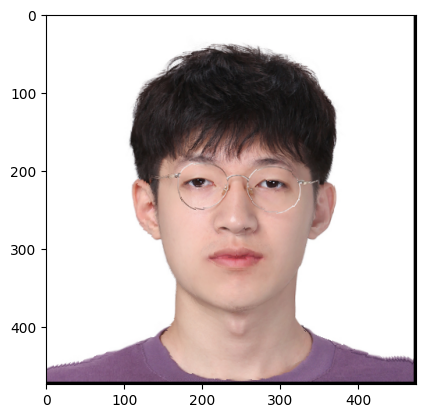

In [22]:
midway_result_int = midway_result1.astype(np.int32)
cv2.imwrite("result/self_wrap_result.jpg", midway_result_int)
midway_result_rgbint = midway_result_int[..., ::-1]

plt.imshow(midway_result_rgbint)
plt.show()


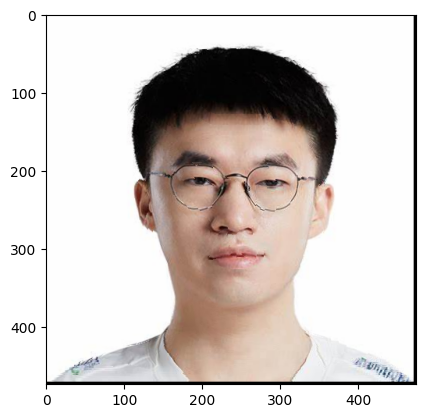

In [23]:
midway_result2 = warp_image(xiaohu, xiaohu_points, midway_points, self.shape)
cv2.imwrite("result/xiaohu_wrap_result.jpg", midway_result2)
midway_result2_int = midway_result2.astype(np.int32)
midway_result2_rgbint = midway_result2_int[..., ::-1]

plt.imshow(midway_result2_rgbint)
plt.show()

Step4: averaging the colors together

In [25]:
def average_color(img1, img2, rate=0.5):
    # using cv2.addWeighted
    
    """
        src1:  the first img
        alpha: weight of src1
        src2:  the second img
        beta:  weight of src2
        gamma: bias
        dst:   average result
        
        dst = src1 * alpha + src2 * beta + gamma
    """
    
    average = cv2.addWeighted(img1, rate, img2, (1 - rate), 0)
    
    return average

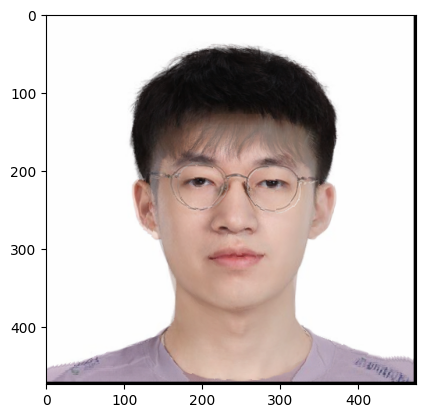

In [87]:
average = average_color(midway_result1, midway_result2, 0.5)
average_int = average.astype(np.int32)
average_rgbint = average_int[..., ::-1]

plt.imshow(average_rgbint)
plt.show()

Part 3. The Morph Sequence

Now we try to implement the whole processing

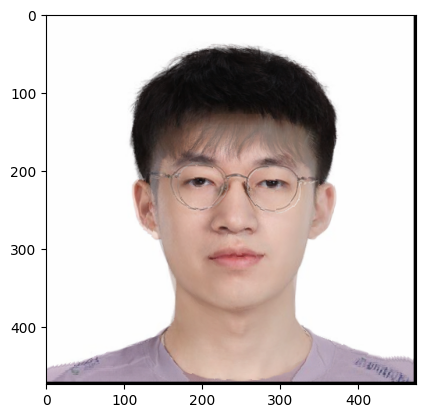

In [96]:
rate = 0.5

self = cv2.imread("data/self.png")
xiaohu = cv2.imread("data/xiaohu.jpg")

self_points = np.load("data/self_points.npy")
xiaohu_points = np.load("data/xiaohu_points.npy")

#self_tri = spatial.Delaunay(self_points)
#xiaohu_tri = spatial.Delaunay(xiaohu_points)

midway_points = get_midway_points(self_points, xiaohu_points, rate)

midway_result1 = warp_image(self, self_points, midway_points, self.shape)
midway_result2 = warp_image(xiaohu, xiaohu_points, midway_points, self.shape)

average = average_color(midway_result1, midway_result2, rate)
average_int = average.astype(np.int32)
average_rgbint = average_int[..., ::-1]

plt.imshow(average_rgbint)
plt.show()

In [21]:
import os

def make_one_frame(img1_path, img2_path, points1_path, points2_path, rate):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    
    if(isinstance(points1_path, str)):
        img1_points = np.load(points1_path)
    else:
        img1_points = points1_path
        
    if(isinstance(points2_path, str)):
        img2_points = np.load(points2_path)
    else:
        img2_points = points2_path
    
    midway_points = get_midway_points(img1_points, img2_points, rate)

    midway_result1 = warp_image(img1, img1_points, midway_points, img1.shape)
    midway_result2 = warp_image(img2, img2_points, midway_points, img2.shape)

    average = average_color(midway_result1, midway_result2, rate)
    average_int = average.astype(np.int32)
    average_rgbint = average_int[..., ::-1]
    
    return average_rgbint
    

after checking the whole process, I make the gif

In [102]:
import imageio
from PIL import Image

img1_path = "data/self.png"
img2_path = "data/xiaohu.jpg"

points1_path = "data/self_points.npy"
points2_path = "data/xiaohu_points.npy"

frame_num = 45
frame_list = []
time_per_frame = 0.1

for index in range(frame_num):
    rate = (1.0 / frame_num) * (frame_num - index)
    frame = make_one_frame(img1_path,img2_path,points1_path,points2_path,rate)
    
    frame_list.append(frame)
    
imageio.mimsave('result/result.gif', frame_list, duration = time_per_frame)

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 

Part 4. The "Mean face" of a population

In [36]:
import glob
import os

images = []
pointss = []

dir_path = "dataset/"
images_path = glob.glob(dir_path + "*b.jpg")

for path in images_path:
    image = cv2.imread(path)
    images.append(image)
    
if(os.path.exists('data/dataset_points_b.npy') == False):
    for image in images:
        points = get_face_points(image)
        pointss.append(points)

In [37]:
np.save("data/dataset_points_b.npy", pointss)

In [38]:
print(len(images))
print(len(pointss))

200
200


In [23]:
def get_average_points(pointss):
    average_points = []
    num_of_image = len(pointss)
    num_of_point = len(pointss[0])
    
    #print(num_of_image, num_of_point)
    
    for i in range(num_of_point):
        x = y = 0
        
        for j in range(num_of_image):
            x += pointss[j][i][0]
            y += pointss[j][i][1]
        
        average_point = [x / num_of_image, y / num_of_image] 
        average_points.append(average_point)
        
    return np.array(average_points).astype(np.int32)

In [39]:
import os
average_points = None
if(os.path.exists('data/dataset_points_b.npy')):
    pointss = np.load('data/dataset_points_b.npy')
    average_points = get_average_points(pointss)

In [40]:
from scipy import spatial
warp_results = []

for i in range(len(images)):
    if((i+1)%10==0):
        print(f"warp {i}/{len(images)} image")
    warp_result = warp_image(images[i], pointss[i], average_points, images[i].shape)
    warp_results.append(warp_result)

warp 9/200 image
warp 19/200 image
warp 29/200 image
warp 39/200 image
warp 49/200 image
warp 59/200 image
warp 69/200 image
warp 79/200 image
warp 89/200 image
warp 99/200 image
warp 109/200 image
warp 119/200 image
warp 129/200 image
warp 139/200 image
warp 149/200 image
warp 159/200 image
warp 169/200 image
warp 179/200 image
warp 189/200 image
warp 199/200 image


In [33]:
def average_imageslist_color(images, weights=None):
    # initialize the average
    average = images[0].astype(np.float32)

    # visit all images
    for i, img in enumerate(images[1:-1]):
        
        average += img.astype(np.float32)
        
    average /= len(images)
    average = average.astype(np.int32)

    return average

In [22]:
from matplotlib import pyplot as plt

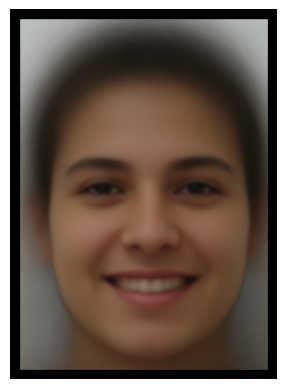

In [41]:
average_face = average_imageslist_color(warp_results)
cv2.imwrite("result/average_face_b.jpg", average_face)
average_face_rgbint = average_face.astype(np.int32)[..., ::-1]
plt.imshow(average_face_rgbint)
plt.axis('off')
#plt.savefig("result/average_face_b.jpg")
plt.show()

In [24]:
cv2.imwrite("result/average_face.jpg", average_face)

True

Part5: Caricatures: Extrapolating from the mean

Part5. The mean of yellow face:

In [11]:
image = cv2.imread("yellow_face/0.png")
print("origin size: ", image.shape)
image = cv2.resize(image, (474,474))
print("new size: ", image.shape)
cv2.imshow("example", image)
cv2.waitKey(0)

origin size:  (1024, 1024, 3)
new size:  (474, 474, 3)


-1

In [47]:
import glob
from tqdm import tqdm

yellow_images = []
pointss = []

dir_path = "yellow_face/"
images_path = glob.glob(dir_path + "*.png")

for path in tqdm(images_path):
    image = cv2.imread(path)
    image = cv2.resize(image, (474,474))
    yellow_images.append(image)
    
if(os.path.exists('data/yellow_face_points.npy') == False):
    for image in tqdm(images):
        points = get_face_points(image)
        pointss.append(points)
    
    np.save("data/yellow_face_points.npy", pointss)

In [48]:
import os
yellow_pointss = None
if(os.path.exists('data/yellow_face_points.npy')):
    yellow_pointss = np.load('data/yellow_face_points.npy')
    yellow_average_points = get_average_points(yellow_pointss)

In [43]:
from scipy import spatial
warp_results1 = []

for i in range(1000):
    if((i+1)%10==0):
        print(f"warp {i}/{len(yellow_images)} image")
    warp_result = warp_image(yellow_images[i], yellow_pointss[i], yellow_average_points, yellow_images[i].shape)
    warp_results1.append(warp_result)

In [49]:
warp_results2 = []

for i in range(1000, len(yellow_images)):
    if((i+1)%10==0):
        print(f"warp {i}/{len(yellow_images)} image")
    warp_result = warp_image(yellow_images[i], yellow_pointss[i], yellow_average_points, yellow_images[i].shape)
    warp_results2.append(warp_result)

In [33]:
yellow_warp_results = warp_results1 + warp_results2

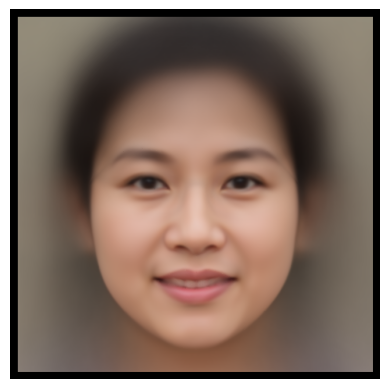

In [34]:
yellow_warp_results = warp_results1 + warp_results2
yellow_average_face = average_imageslist_color(yellow_warp_results)
yellow_average_face_rgbint = yellow_average_face.astype(np.int32)[..., ::-1]
plt.imshow(yellow_average_face_rgbint)
plt.axis('off')
plt.show()

In [35]:
cv2.imwrite("result/yellow_average_face.jpg", yellow_average_face)

True

Part5: Caricatures: Extrapolating from the mean

In [6]:
import cv2
mean = cv2.imread("result/yellow_average_face.jpg")
me = cv2.imread("data/Part5.png")

In [7]:
me_points = get_face_points(me)
mean_points = get_face_points(mean)
me_result = show_face_points(me, me_points, "data/me.jpg")
mean_result = show_face_points(mean, mean_points, "data/mean.jpg")

In [9]:
show_list = []
for rate in range(5):
    midway_points = me_points + rate * (mean_points - me_points)
    midway_result1 = warp_image(me, me_points, midway_points, me.shape)
    cv2.imwrite("result/Caricatures_{}.jpg".format(rate), midway_result1)
    show_list.append(midway_result1)
#midway_result2 = warp_image(mean, mean_points, midway_points, mean.shape)

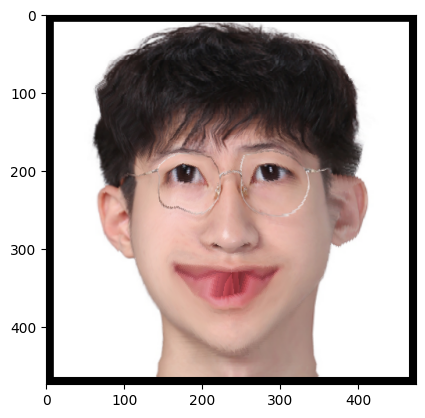

In [55]:
midway_result1 = midway_result1.astype(np.int32)
midway_result1 = midway_result1[..., ::-1]

plt.imshow(midway_result1)
plt.show()

Part6: Change gender

In [14]:
female = cv2.imread("data/Asian_female.png")
me = cv2.imread("data/Part5.png")

In [15]:
shape = female.shape
height, width, _ = shape
me = cv2.resize(me, (width, height))
cv2.imwrite("data/Part6.png", me)

True

In [31]:
me_path = "data/Part6.png"
female_path = "data/Asian_female.png"
me_points = get_face_points(me)
female_points = get_face_points(female)
changed_gender = make_one_frame(me_path,female_path,me_points,female_points,0.3)

In [32]:
changed_gender = changed_gender[..., ::-1]
cv2.imwrite("result/changed_gender.jpg", changed_gender)

True